# Sliding Window Functions Lab

### Introduction

In this lesson, we'll practice working with sliding windows in SQL.  Let's get started.

### Loading our Data

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/data-eng-10-21/window-functions/main/stocks/"
stocks_fund_df = pd.read_csv(f'{url}/fundamentals.csv', nrows = 10000)
prices_df  = pd.read_csv(f'{url}/prices.csv', nrows = 10000)

In [36]:
import sqlite3
conn = sqlite3.connect('stocks.db')

In [37]:
stocks_fund_df[:1]

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.6,335000000.0


In [38]:
stocks_fund_df.to_sql('fundamentals', conn, index = False)

/Users/jeffreykatz/miniconda3/envs/minimal_de/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [39]:
prices_df.to_sql('prices', conn, index = False)

In [40]:
pd.read_sql('SELECT * FROM fundamentals LIMIT 1', conn)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.6,335000000.0


In [44]:
pd.read_sql('SELECT * FROM prices LIMIT 3', conn)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


### Exploring our Data

Let's start by calculating the five day moving average of AAPL's opening price.  Limit the number of rows to 15, ordered from earliest date to latest.  Display the original opening column, and the five day moving average.

<img src="./appl-answer.png" width="40%">

In [64]:
query = """

"""
apple_five_df = pd.read_sql(query, conn)
apple_five_df

,symbol,open,five_day
0,AAPL,213.429998,214.136663
1,AAPL,214.599998,213.539997
2,AAPL,214.379993,212.891997
3,AAPL,211.750000,212.765996
4,AAPL,210.299994,211.683996
5,AAPL,212.799997,210.381998
6,AAPL,209.189995,210.053999
7,AAPL,207.870005,210.179999
8,AAPL,210.110003,209.286000
9,AAPL,210.929995,210.430002


Now let's plot the smoothed and unsmoothed data below.  So we can see that we see less movement in the stock with the smoothed data.

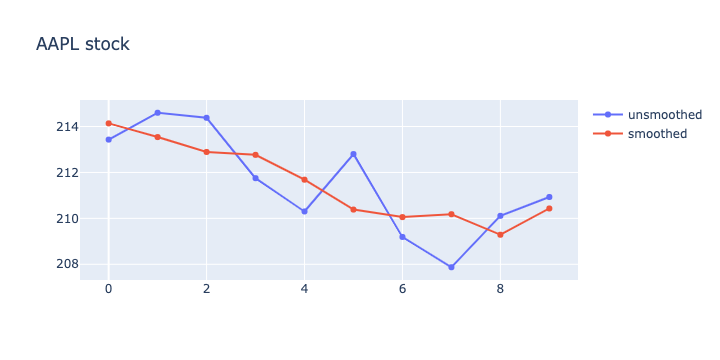

In [65]:
import plotly.graph_objects as go

unsmoothed = go.Scatter(y = apple_five_df.open, name = 'unsmoothed')
smoothed = go.Scatter(y = apple_five_df.five_day, name = 'smoothed')

go.Figure(data = [unsmoothed, smoothed], 
          layout = {'title': 'AAPL stock'})

Now let's display the opening and one day difference in AAPL stock price.  Order by date from lowest to highest, and display the first ten rows.

<img src="./aapl-diff.png" width="40%">

In [70]:
query = """

"""
apple_five_df = pd.read_sql(query, conn)
apple_five_df

,symbol,open,price_diff
0,AAPL,213.429998,NaN
1,AAPL,192.369997,-8.709999
2,AAPL,206.780006,-5.299988
3,AAPL,202.510002,-4.270004
4,AAPL,201.079996,-3.850008
5,AAPL,209.189995,-3.610002
6,AAPL,212.079994,-2.830012
7,AAPL,211.750000,-2.629993
8,AAPL,208.330002,-2.599993
9,AAPL,204.930004,-1.919991


Next, let's find the one day difference in opening prices across all stocks, order the results by the largest one day change.

<img src="./largest-change.png" width="40%">

In [78]:
query = """

"""
apple_five_df = pd.read_sql(query, conn)
apple_five_df

,symbol,date,open,price_diff
0,CME,2010-01-22,308.160000,-22.510013
1,GOOG,2010-01-13,576.490965,-21.160046
2,GOOGL,2010-01-13,576.490018,-21.159971
3,ISRG,2010-01-22,328.750000,19.950012
4,GOOGL,2010-01-22,564.500006,-18.940025
5,GOOG,2010-01-22,564.500980,-18.940022
6,GOOG,2010-01-25,546.590929,-17.910051
7,GOOGL,2010-01-25,546.590016,-17.909990
8,GOOG,2010-01-08,592.000997,-17.400028
9,GOOGL,2010-01-08,592.000005,-17.400003


It looks like Google has the largest fluctuations.  But it's all relative.  This may be because Google has a larger stock price in general.  So let's run the query again, this time adding a column for the average opening price of the two days prior to the current day.

Again, order the results by the largest change and limit to the top ten results. 

<img src="./relative-diff.png" width="60%">

In [89]:
query = """

"""
apple_five_df = pd.read_sql(query, conn)
apple_five_df

,symbol,date,open,price_diff,two_days_prior
0,CME,2010-01-22,308.160000,-22.510013,333.806673
1,GOOG,2010-01-13,576.490965,-21.160046,598.037689
2,GOOGL,2010-01-13,576.490018,-21.159971,598.036667
3,ISRG,2010-01-22,328.750000,19.950012,309.299998
4,GOOGL,2010-01-22,564.500006,-18.940025,583.540029
5,GOOG,2010-01-22,564.500980,-18.940022,583.541005
6,GOOG,2010-01-25,546.590929,-17.910051,577.974330
7,GOOGL,2010-01-25,546.590016,-17.909990,577.973356
8,GOOG,2010-01-08,592.000997,-17.400028,620.814392
9,GOOGL,2010-01-08,592.000005,-17.400003,620.813347


### Summary

In this lesson, we practiced working with sliding window functions both by calculating moving averages, and by using the lag function to calculate the change over earlier dates.

Feel free to practice more, or read more on window functions with the SQLite documentation [here](https://www.sqlite.org/windowfunctions.html).

It's also worth reviewing with this [guide to window functions](https://mode.com/sql-tutorial/sql-window-functions/#row_number).